In [171]:
#https://github.com/vutsalsinghal/EigenFace/blob/master/Face%20Recognition.ipynb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import random
from heapq import *

In [172]:
# this command will download the LFW_people's dataset to hard disk.
lfw_people = fetch_lfw_people(data_home='D:\Senior II\Image Processing\Project\LFW Dataset',
min_faces_per_person = 40, resize = 0.4)


In [173]:
# introspect the images arrays to find the shapes (for plotting)
m, h, w = lfw_people.images.shape
images = lfw_people.images

# Instead of providing 2D data, X has data already in the form of a vector that
# is required in this approach.
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

# Print Details about dataset
print("Number of Examples: % d" % m)
print("Number of features: % d" % n_features)
print("Number of Class Labels: % d" % n_classes)

Number of Examples:  1867
Number of features:  1850
Number of Class Labels:  19


George W Bush


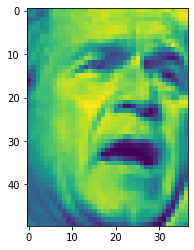

In [174]:
#View an image
index = int(random.random() * images.shape[0])
# index = 0
name = target_names[y[index]]
print(name)
plt.imshow(images[index,:,:])
plt.show()

In [175]:
#Flatten images array
flattened_images = images.reshape(m, -1).T
# N^2 * M
print(f'Shape after flattening: {flattened_images.shape}')

Shape after flattening: (1850, 1867)


In [176]:
# A is the matrix of averaged images
average = np.average(flattened_images, axis = 1, keepdims = True).squeeze()
A = (flattened_images - np.average(flattened_images, axis = 1, keepdims = True))
# N^2 * M
print(A.shape)

(1850, 1867)


In [177]:
cov = np.cov(A.T) / m
# m*m
print(f'Covariance Matrix Shape: {cov.shape}')

Covariance Matrix Shape: (1867, 1867)


In [178]:
#eigenvectors are stacked in columns
eigenvalues, eigenvectors = np.linalg.eig(cov)
print(f'Shape of eigenvalues: {eigenvalues.shape}')
print(f'Shape of eigenvectors: {eigenvectors.shape}')

Shape of eigenvalues: (1867,)
Shape of eigenvectors: (1867, 1867)


In [179]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]
eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

In [180]:
K = 900
reduced_data = np.array(eigvectors_sort[:K]).transpose()
# N^2 * K
print(reduced_data.shape)

(1867, 900)


In [181]:
proj_data = np.dot(flattened_images, reduced_data).T
# K * m
print(proj_data.shape)

(900, 1850)


In [182]:
w = np.array([np.dot(proj_data,i) for i in A.T])
# N^2 * K
print(w.shape)

(1867, 900)


In [183]:
index = int(random.random() * images.shape[0])
#take on image from A randomly
test_image = A[:, index] - average
#flatten test image
test_image_flattened = test_image.reshape(-1, 1)

In [184]:
#Test in a loop
count = 0
trials = 1000
for i in range(trials):
    index = int(random.random() * images.shape[0])
    #take on image from A randomly
    test_image = A[:, index] - average
    #flatten test image
    test_image_flattened = test_image.reshape(-1, 1)

    w_unknown = np.dot(proj_data, test_image_flattened)
    diff  = w.T - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    predicted_index = np.argmin(norms)
    

    name = target_names[y[index]]
    predicted_name = target_names[y[predicted_index]]

    if(name == predicted_name):
        count += 1
print(f'Accuracy: {(count / trials) * 100}%')

Accuracy: 2.7%
